This model was trained on an unbalanced dataset. Please see BERT 2 Class Training on Balanced Dataset.ipynb for training on a balanced dataset 

# Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Extracted Sentences/"

In [ ]:
import json

In [ ]:
with open(MODEL_PATH + "all_years_array.json", "r") as f:
    all_docs = json.load(f)

In [ ]:
len(all_docs)

700

In [ ]:
all_docs_1D = [j for sub in all_docs for j in sub]

In [ ]:
len(all_docs_1D)

755496

In [ ]:
orig_molecules = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]

In [ ]:
molecule_labels = [1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1] 
label_dict = {k:v for (k,v) in zip(orig_molecules, molecule_labels)}

In [ ]:
import pandas as pd
new_molecules_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/Named_Entity_Recognition/Abrv_Curated.csv", header=None)
new_molecules_df

,0,1,2,3,4,5
0,pi,phosphatidylinositol,NaN,NaN,NaN,NaN
1,pe,phosphatidylethanolamine,NaN,NaN,NaN,NaN
2,sm,sphingomyelin,NaN,NaN,NaN,NaN
3,hrp,horseradish peroxidase,NaN,NaN,NaN,NaN
4,ritc,rhodamine isothiocyanate,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1075,ma,methacrylate,NaN,NaN,NaN,NaN
1076,moetacl,hema-2[2-(methacryloyloxy)ethyl]trimethylammon...,NaN,NaN,NaN,NaN
1077,th-,tyrosine hydroxylase-,NaN,NaN,NaN,NaN
1078,phb,poly-beta-hydroxybutyrate,NaN,NaN,NaN,NaN


In [ ]:
new_molecules = list(set(new_molecules_df.loc[:,0]))

In [ ]:
new_molecules_df[new_molecules_df[0] == 'if']

,0,1,2,3,4,5
943,if,intermediate filament s,NaN,NaN,NaN,NaN


In [ ]:
new_molecules.remove("if")
new_molecules.remove("of")
new_molecules.remove("am")
new_molecules.remove("fat")
new_molecules.remove("th")
new_molecules.remove("th-")
new_molecules.remove("m.")
new_molecules.remove("set")
new_molecules.remove("protein")

In [ ]:
len(new_molecules)

813

In [ ]:
import gensim 

MODEL_PATH_ALL = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Gensim_Lemmatized_All_Docs/"
model_all_years = gensim.models.KeyedVectors.load(MODEL_PATH_ALL + "{}.wordvectors".format("All Papers"), mmap='r')
wordvec = model_all_years

molecules_embedded = [] 
for m in list(new_molecules): # create copy so removing doesn't mess with iterator 
  try:
    molecules_embedded.append(wordvec[m])
  except KeyError:
    new_molecules.remove(m)

In [ ]:
len(new_molecules)

571

# Generating Supervised Sentences only from Orig Molecules


In [ ]:
to_remove = orig_molecules.index("lar")
orig_molecules.pop(to_remove) 
molecule_labels.pop(to_remove)

0

In [ ]:
orig_molecules

['netrin',
 'ephrin',
 'laminin',
 'tenascin',
 'cspg',
 'zymosan',
 'camp',
 'pten',
 'cntf',
 'lif',
 'oncomodulin',
 'stat3',
 'socs3',
 'rhoa',
 'rock',
 'y27632',
 'nogo',
 'klf',
 'ngr',
 'tlr2',
 'bdnf',
 'igf1',
 'opn',
 'mag',
 'omgp',
 'kspg',
 'taxol']

In [ ]:
label_dict = {k:v for (k,v) in zip(orig_molecules, molecule_labels)}
label_dict

{'netrin': 1,
 'ephrin': 0,
 'laminin': 1,
 'tenascin': 0,
 'cspg': 0,
 'zymosan': 1,
 'camp': 1,
 'pten': 0,
 'cntf': 1,
 'lif': 1,
 'oncomodulin': 1,
 'stat3': 1,
 'socs3': 0,
 'rhoa': 0,
 'rock': 0,
 'y27632': 1,
 'nogo': 0,
 'klf': 1,
 'ngr': 0,
 'tlr2': 1,
 'bdnf': 0,
 'igf1': 1,
 'opn': 1,
 'mag': 0,
 'omgp': 0,
 'kspg': 0,
 'taxol': 1}

In [ ]:
# make sure to initialize this AFTER removing molecules with no embeddings
orig_molecules_double_spaced = [" " + m + " " for m in orig_molecules]
print(orig_molecules_double_spaced)

[' netrin ', ' ephrin ', ' laminin ', ' tenascin ', ' cspg ', ' zymosan ', ' camp ', ' pten ', ' cntf ', ' lif ', ' oncomodulin ', ' stat3 ', ' socs3 ', ' rhoa ', ' rock ', ' y27632 ', ' nogo ', ' klf ', ' ngr ', ' tlr2 ', ' bdnf ', ' igf1 ', ' opn ', ' mag ', ' omgp ', ' kspg ', ' taxol ']


In [ ]:
# make sure to initialize this AFTER removing molecules with no embeddings
new_molecules_double_spaced = [" " + m + " " for m in new_molecules]
print(new_molecules_double_spaced)

[' ppi ', ' myti ', ' egta ', ' tmc ', ' cre ', ' acpase ', ' pi3k ', ' gfp ', ' pjnk ', ' cmd ', ' klf4 ', ' mog ', ' gpcrs ', ' dopac ', ' kinases ', ' dab ', ' il ', ' tnfa ', ' ggf2 ', ' plga ', ' dtt ', ' hdac5 ', ' spion ', ' trk ', ' nmda ', ' ntfs ', ' pde4 ', ' bme ', ' osm ', ' atf ', ' yfp ', ' s1pr2 ', ' dii ', ' vcan ', ' dpy ', ' pkg ', ' acs ', ' tubulin ', ' klfs ', ' soc3 ', ' dclks ', ' egf ', ' tdt ', ' ii ', ' chabc ', ' ntn ', ' plla ', ' nos2 ', ' praptor ', ' parv ', ' hepes ', ' gags ', ' pthrp ', ' ulip ', ' cont ', ' p5klf6 ', ' amp ', ' dnmts ', ' dapi ', ' socs3 ', ' tzds ', ' fbn ', ' trkb ', ' aqp9 ', ' sema6a ', ' pla ', ' dic ', ' ppp ', ' shh ', ' pdpk1 ', ' il1rn ', ' mr ', ' gaba ', ' dna ', ' gdf11 ', ' prb1 ', ' sema3a ', ' lmo4 ', ' rna ', ' rock ', ' nc ', ' npc ', ' ptpσ ', ' pge2 ', ' aqp ', ' nile ', ' ngr1 ', ' kspgs ', ' mmtv ', ' psn ', ' cscl ', ' gfap ', ' drgs ', ' app ', ' nrs ', ' tcr ', ' pst ', ' neo ', ' gap43 ', ' p75ntr ', ' limk1 

In [ ]:
# from collections import defaultdict
# # 0 index will be num of inihibitors, 1st index will be number of promoters 
# trainable_sentences = defaultdict(int)
# for counter, sentence in enumerate(all_docs_1D):
#   promoter = False 
#   inhibitor = False
#   for molecule in orig_molecules_double_spaced:
#     if molecule in sentence:
#       molecule_label = label_dict[molecule.strip()]
#       if molecule_label == 0:
#         inhibitor = True 
#       else:
#         promoter = True 

#   to_label = 0 
#   if promoter and inhibitor:
#     continue 
#   if not promoter and not inhibitor:
#     found_new_molecule = False
#     for new_molecule in new_molecules_double_spaced:
#       if new_molecule in sentence:
#         found_new_molecule = True 
#         break 
#     if found_new_molecule:
#       print(f"{counter}/{len(all_docs_1D)}")
#       print("--> Skipping sentence found new molecule")
#       continue # don't label if there's one of the new molecules in there
#     else:
#       to_label = 2 # if no new molecule then can label as neutral 
#   if promoter and not inhibitor:
#     to_label = 1
#   elif not promoter and inhibitor:
#     to_label = 0 

#   print(f"{counter}/{len(all_docs_1D)}")
#   print(f"--> P:{promoter} and I:{inhibitor} found in {sentence.strip()}")
#   print(f"--> Labeling sentence as {to_label}")
#   trainable_sentences[sentence.strip()] = to_label

# trainable_sentences

In [ ]:
# import pickle
# with open("/content/drive/MyDrive/Linguistic Causation/Roberta Model/Saved Models/trainable_sentences.pkl", 'wb') as handle:
#     pickle.dump(trainable_sentences, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import pickle
with open("/content/drive/MyDrive/Linguistic Causation/Roberta Model/Saved Models/trainable_sentences.pkl", 'rb') as handle:
    trainable_sentences = pickle.load(handle)

trainable_sentences

defaultdict(int,
            {'c 1 77j\t,': 2,
             'vi.': 2,
             'experiments on the nerves, particularly on their repro\xad duction,·  and  on  the  spinal  marrow  of living animals.': 2,
             'by': 2,
             '\\villiam cruikshank,  esq.': 2,
             'communicated  by the late john': 2,
             'hunter, esq.': 2,
             'f. r. s.': 2,
             'read june 13, 1776.': 2,
             'the nerves on which these experiinents were 1nade are, the par vagum, and intercostal.': 2,
             'the par vagum arise from the basis of the brain, pass through the basis of the skull, along with the internal jugular veins.': 2,
             'they are distributed to the tongue, resophagus, larynx, heart, and lungs; and, running on each side of the resophagus, may be said to terminate in the stomach, liver, and semilunar ganglion of the intercostals, be\xad low the diaphragm; from whence they are again distributed to the viscera of the abdomen.': 2

# Training BioBert

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 26.4 MB/s 
     |████████████████████████████████| 182 kB 65.2 MB/s 
     |████████████████████████████████| 7.6 MB 59.0 MB/s 


In [ ]:
## Model.py ## 

import transformers, torch
import torch.nn as nn
import torch.nn.functional as F

tokenizer = transformers.RobertaTokenizerFast.from_pretrained("roberta-base")

def _tokenize(st):
    tokenized_st = tokenizer(
        st,
        max_length=64,
        padding="max_length",
        truncation=True,
    )
    return tokenized_st


DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", DEVICE)


class TrainingModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.encoder = transformers.RobertaModel.from_pretrained("roberta-base")
        self.linear = nn.Linear(self.encoder.config.hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, batch):
        encoder_out = self.encoder(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
        )
        logits = self.linear(encoder_out["pooler_output"])
        output = self.softmax(logits)
        result = {"output": output}
        if "labels" in batch:
            result["loss"] = F.cross_entropy(output, batch["labels"])
        return result


class InferenceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = transformers.RobertaModel.from_pretrained("roberta-base")
        self.linear = nn.Linear(self.encoder.config.hidden_size, 3)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, tokenized_comment):
        encoder_out = self.encoder(
            input_ids = torch.as_tensor(tokenized_comment["input_ids"]).unsqueeze(0).to(DEVICE),
            attention_mask = torch.as_tensor(tokenized_comment["attention_mask"]).unsqueeze(0).to(DEVICE),
        )
        logits = self.linear(encoder_out["pooler_output"])
        return self.softmax(logits)


class Predict:
    def __init__(self, model_name):
        self.model = InferenceModel()
        self.model.load_state_dict(torch.load(model_name, map_location=DEVICE))
        self.model = self.model.to(DEVICE)
        self.model.eval()

    def process_eval(self, s):
        # s = strip_tags(s)
        tokens = _tokenize(s)
        return tokens


    def predict(self, comment):
        tokenized_comment = self.process_eval(comment)
        with torch.no_grad():
            logits = self.model(tokenized_comment)
        
        return [float(l) for l in logits.cpu().detach().numpy()[0]]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Using device cuda


In [ ]:
from torch.utils.data import DataLoader, Dataset

class Data(Dataset):
# class Data(list):
    def __init__(self, X, y):
        assert len(X) == len(y)
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return_item = _tokenize(self.X[idx])
        return_item["label"] = self.y[idx]

        return return_item

In [ ]:
import numpy as np 
import collections
values_arr = list(trainable_sentences.values())
counter = collections.Counter(values_arr)
counter

Counter({2: 580773, 0: 2631, 1: 1279})

In [ ]:
print(f"Num Sentences Not Included: {len(all_docs_1D) - counter[0] - counter[1] - counter[2]}")

Num Deleted: 746586


In [ ]:
trainable_sentences_copy = trainable_sentences.copy()

In [ ]:
# target = counter[2] - 5000
# num_deleted = 0 
# for k,v in trainable_sentences_copy.copy().items():
#   if v == 2:
#     del trainable_sentences_copy[k]
#     num_deleted += 1
#   if num_deleted == target:
#     break 

In [ ]:
target = counter[2] - 5000
just_neither = {k:v for k,v in trainable_sentences_copy.items() if v == 2}
print(len(just_neither))

import random 
keys_to_delete = random.sample(just_neither.keys(), target)
keys_to_delete

580773


['nonmedullated,',
 'magnificent',
 "much  better is mestrezat's\tof comparing the precipitate given by boiling with  trichloracetic   acid, with a\t\t\tof tubes containing known  quantities  of\t\t\tthis is made by",
 'these methods have a limited applicability to the facial nerve.',
 'spend',
 'de biol-,\tlxxviil,   p. 3.',
 'for\tcollection\ttraits which',
 'a}«}s',
 'entrance\tthe same reasoning  applies\tthe',
 'most evident',
 '260-273.',
 'chir., 1910, xvi, 481.',
 '1 drop 1 °lo pilocarpine applied to each eye.',
 'fibrosum, 547',
 'professor of medicine, university of bristol; lieuten.a.nt\xad colonel, r..a.m.c.',
 'visuotemporal cor- tices can also be activated with coloured images of natural objects79.',
 '1 . simple  functional\tjoint surfaces being normal',
 'wong et al.',
 'he  was  given  foll  diet and a daily injection.of 0.125 gram contramine for four con\xad secutive days ; by march 2nd, within a week, the epithelial lesions were cured.',
 '<\to0',
 '8\tintroduction— 

In [ ]:
for k in keys_to_delete:
  del trainable_sentences_copy[k]

In [ ]:
values_arr = list(trainable_sentences_copy.values())
counter = collections.Counter(values_arr)
counter

Counter({2: 5000, 0: 2631, 1: 1279})

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split

features_arr = list(trainable_sentences_copy.keys())
targets_arr = list(trainable_sentences_copy.values())
X_train, X_test, y_train, y_test = train_test_split(features_arr, targets_arr, test_size=0.20)

y_train = [int(x) for x in y_train]
y_test = [int(x) for x in y_test]

train_dataset = Data(X_train, y_train)
val_dataset = Data(X_test, y_test)

In [ ]:
## train.py ## 

import numpy as np
import torch
from transformers import AdamW
from tqdm import tqdm
# from Model import TrainingModel
import transformers
from sklearn.metrics import roc_auc_score
# from plot_results import plot


num_epochs = 10
DOWNSAMPLE = True
NARROW = None #"UCOMrUmOTPD_AnSivjxptxpA" #Louis
IGNORE_WHALE = False
model_tag = 'thoughtful_channels'


DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", DEVICE)

def to_device(batch):
    return {k: v.to(DEVICE) for k, v in batch.items()}


# train_dataloader, val_dataloader = get_data_main(NARROW, DOWNSAMPLE, IGNORE_WHALE)
train_dataloader = DataLoader(
        train_dataset,
        batch_size=32,
        shuffle=True,
        collate_fn=transformers.data.DataCollatorWithPadding(tokenizer),
    )

val_dataloader = DataLoader(
        val_dataset,
        batch_size=32,
        shuffle=False,
        collate_fn=transformers.data.DataCollatorWithPadding(tokenizer),
)

model = TrainingModel(num_classes=3).to(DEVICE)
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=0.01)

scheduler = transformers.get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=100,  
    num_training_steps=len(train_dataloader) * num_epochs,
)


all_auc, all_val_loss, all_train_loss = [], [], []
for epoch in range(num_epochs):
    train_loss_ls = []
    model.train()
    for batch in tqdm(train_dataloader, desc=f"train e_{epoch}"):
        optimizer.zero_grad()
        out = model(to_device(batch))
        out["loss"].backward()

        optimizer.step()
        scheduler.step()
        train_loss_ls.append(out["loss"].item())

    optimizer.zero_grad()
    train_loss = np.mean(train_loss_ls)

    # validation
    model.eval()
    val_loss_ls, y_hat, y_true = [], [], []
    for batch in tqdm(val_dataloader, desc="val"):
        batch = to_device(batch)
        with torch.inference_mode():
            out = model(batch)
        
        output = out['output'].cpu().numpy()
        y_hat.append(output) 
        # batch_labels = [np.argmax(sample) for sample in output]
        # y_hat.append(batch_labels)
        # y_hat.append(output[:, 1]) ## confidence for a positive sample
        
        # preds = out["output"].argmax(-1).detach()
        # y_pred.append(preds.cpu().float().numpy())
        y_true.append(batch["labels"].cpu().float().numpy())
        val_loss_ls.append(out["loss"].item())

    # y_true, y_hat = np.concatenate(y_true), np.concatenate(y_hat)
    y_true = np.concatenate(y_true)
    y_hat_flattened = [] 
    for batch in y_hat: 
      for sample in batch:
        y_hat_flattened.append(sample) 
    auc = roc_auc_score(y_true, y_hat_flattened, multi_class='ovr') if len(np.unique(y_true)) > 1 else -1
    val_loss = np.mean(val_loss_ls)

    all_auc.append(auc)
    all_val_loss.append(val_loss)
    all_train_loss.append(train_loss)

    print(f"Epoch {epoch}: AUC={auc:.2f}, Train Loss={train_loss:.2f}, Val Loss={val_loss:.2f}\n")

Using device cuda


Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warn

Epoch 0: AUC=0.96, Train Loss=0.86, Val Loss=0.70



val: 100%|██████████| 56/56 [00:06<00:00,  8.99it/s]


Epoch 1: AUC=0.99, Train Loss=0.63, Val Loss=0.59



val: 100%|██████████| 56/56 [00:06<00:00,  9.04it/s]


Epoch 2: AUC=0.99, Train Loss=0.60, Val Loss=0.59



val: 100%|██████████| 56/56 [00:06<00:00,  9.00it/s]


Epoch 3: AUC=0.99, Train Loss=0.58, Val Loss=0.59



val: 100%|██████████| 56/56 [00:06<00:00,  9.05it/s]


Epoch 4: AUC=0.99, Train Loss=0.58, Val Loss=0.59



val: 100%|██████████| 56/56 [00:06<00:00,  9.01it/s]


Epoch 5: AUC=1.00, Train Loss=0.58, Val Loss=0.59



val: 100%|██████████| 56/56 [00:06<00:00,  9.01it/s]


Epoch 6: AUC=1.00, Train Loss=0.57, Val Loss=0.58



val: 100%|██████████| 56/56 [00:06<00:00,  9.05it/s]


Epoch 7: AUC=1.00, Train Loss=0.57, Val Loss=0.58



val: 100%|██████████| 56/56 [00:06<00:00,  9.05it/s]


Epoch 8: AUC=1.00, Train Loss=0.57, Val Loss=0.58



val: 100%|██████████| 56/56 [00:06<00:00,  8.99it/s]


Epoch 9: AUC=1.00, Train Loss=0.57, Val Loss=0.57



In [ ]:
all_auc

[0.9559281934916578,
 0.9919304738270313,
 0.9932926635189422,
 0.9926801360359248,
 0.9932459180870291,
 0.9953599923858706,
 0.9956650775952064,
 0.9964351010903926,
 0.9967921452072996,
 0.9967708886480388]

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/Linguistic Causation/Roberta Model/Saved Models/Supervised_3_classes_random_neither_10_epochs.pth")

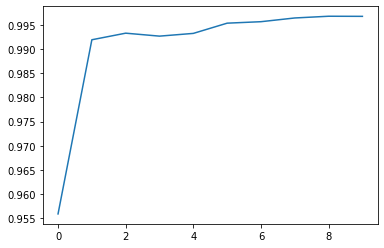

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(num_epochs)), all_auc) 

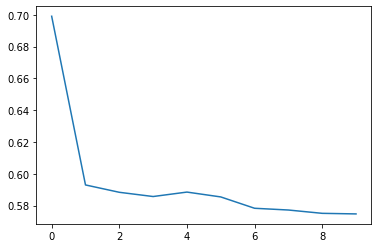

In [ ]:
plt.plot(list(range(num_epochs)), all_val_loss) 

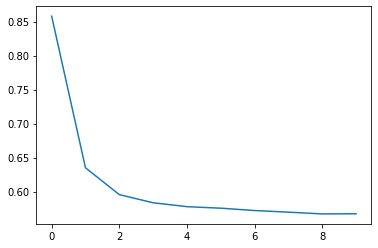

In [ ]:
plt.plot(list(range(num_epochs)), all_train_loss)

In [ ]:
p = Predict("/content/drive/MyDrive/Linguistic Causation/Roberta Model/Saved Models/Supervised_3_classes_random_neither_10_epochs.pth") 
# model.load_state_dict(torch.load(bert_model_path))
# model.eval()

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
p.predict("with camp we can accelerate axon growth") 

[0.0001597082446096465, 0.9997432827949524, 9.703686373541132e-05]

In [ ]:
p.predict("lma is a great promoter of optic nerve regeneration") 

[0.00012398541730362922, 4.349961091065779e-05, 0.9998325109481812]

In [ ]:
p.predict("we show that mag is a strong inhibitor") 

[0.999826967716217, 8.160052675521001e-05, 9.142608905676752e-05]

In [ ]:
p.predict("pbs is a saline") 

[5.902216798858717e-05, 3.7250883906381205e-05, 0.999903678894043]

# Creating Bert Regen Scores 3 Classes for All Molecules

In [ ]:
molecules_double_spaced = orig_molecules_double_spaced + new_molecules_double_spaced

In [ ]:
molecules = orig_molecules + new_molecules

In [ ]:
len(molecules)

In [ ]:
molecules = list((set(molecules)))

In [ ]:
molecules_double_spaced.remove(" no ")

In [ ]:
bert_regen_score_dict_supervised = {} 

for counter, keyword in enumerate(molecules_double_spaced):
  print(f"{counter} / {len(molecules)} Current keyword: " + keyword + "...")
  keyword_regen_score = np.array([0.,0.,0.])
  total_sentences_found = 0
  for sentence in all_docs_1D:
    if keyword in sentence:
      to_add = p.predict(sentence)
      keyword_regen_score += to_add.cpu().detach().numpy()[0]
      total_sentences_found += 1
  
  if total_sentences_found == 0:
    # redo but with no padding spaces around molecule
    for sentence in all_docs_1D:
      if keyword.strip() in sentence:
        to_add = p.predict(sentence)
        keyword_regen_score += to_add.cpu().detach().numpy()[0]
        total_sentences_found += 1

  bert_regen_score_dict_supervised[keyword.strip()] = keyword_regen_score / total_sentences_found 
  print("    Calculated score of {}".format(keyword_regen_score / total_sentences_found)) 

In [ ]:
# len(bert_regen_score_dict_supervised_one) + len(bert_regen_score_dict_supervised)

In [ ]:
# bert_regen_score_dict_supervised_total = {**bert_regen_score_dict_supervised, **bert_regen_score_dict_supervised_one}

In [ ]:
import pickle 
bert_regen_scores_path = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/bert_regen_score_dict_supervised_3_classes.pkl"
with open(bert_regen_scores_path, 'wb') as f:
    pickle.dump(bert_regen_score_dict_supervised, f)

In [ ]:
import pickle 
bert_regen_scores_path = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/bert_regen_score_dict_supervised_3_classes.pkl"
bert_regen_scores_loaded = {} 
with open(bert_regen_scores_path, 'rb') as f:
  bert_regen_scores_loaded = pickle.load(f)

In [ ]:
bert_regen_scores_loaded

# Validating Sentences can be Separated

In [ ]:
orig_molecules = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]

In [ ]:
molecule_labels = [1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1] 
label_dict = {k:v for (k,v) in zip(orig_molecules, molecule_labels)}

In [ ]:
import pandas as pd
new_molecules_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/Named_Entity_Recognition/Abrv_Curated.csv", header=None)
new_molecules_df

In [ ]:
molecules = orig_molecules + list(set(new_molecules_df.loc[:,0]))

In [ ]:
molecules = list(set(molecules))

In [ ]:
new_molecules_df[new_molecules_df[0] == 'if']

In [ ]:
molecules.remove("if")
molecules.remove("of")
molecules.remove("am")
molecules.remove("fat")
molecules.remove("th")
molecules.remove("th-")
molecules.remove("m.")
molecules.remove("set")
molecules.remove("protein")

In [ ]:
import numpy as np
# ensure no duplicates 
val = np.array(molecules) 
ii = np.where(val == "hrp")[0]
ii

In [ ]:
molecule_labels = [1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1] 
len(molecules) == len(molecule_labels)
node_colors = ["green" if x==1 else "red" for x in molecule_labels]

In [ ]:
import gensim 

MODEL_PATH_ALL = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Gensim_Lemmatized_All_Docs/"
model_all_years = gensim.models.KeyedVectors.load(MODEL_PATH_ALL + "{}.wordvectors".format("All Papers"), mmap='r')
wordvec = model_all_years

molecules_embedded = [] 
for m in list(molecules): # create copy so removing doesn't mess with iterator 
  try:
    molecules_embedded.append(wordvec[m])
  except KeyError:
    molecules.remove(m)

In [ ]:
print(len(molecules))
print(len(molecules_embedded))

In [ ]:
# make sure to initialize this AFTER removing molecules with no embeddings
orig_molecules_double_spaced = [" " + m + " " for m in orig_molecules]
print(orig_molecules_double_spaced)

In [ ]:
from collections import defaultdict
# 0 index will be num of inihibitors, 1st index will be number of promoters 
found_sentences = defaultdict(list)
for counter, sentence in enumerate(all_docs_1D):
  for molecule in orig_molecules_double_spaced:
    if molecule in sentence:
      print(f"{counter}/{len(all_docs_1D)}")
      print(f"--> {molecule.strip()} adding to {label_dict[molecule.strip()]}th index")
      cur_list = found_sentences[sentence.strip()]
      if cur_list == []:
        cur_list = [0,0]
      cur_list[label_dict[molecule.strip()]] += 1 
      found_sentences[sentence.strip()] = cur_list

In [ ]:
sentence_df = pd.DataFrame(found_sentences).T
sentence_df.iloc[1000:1010]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sentence_df.columns = ['Num Inhibitors', 'Num Promoters']
sentence_df

In [ ]:
sentence_df['Num Promoters'].values

In [ ]:
num_inhibs = sentence_df['Num Inhibitors'].values
num_promote = sentence_df['Num Promoters'].values

In [ ]:
size_dict = defaultdict(int)
for x,y in zip(num_inhibs, num_promote):
  size_dict[(x,y)] += 1

In [ ]:
sum(size_dict.values())

In [ ]:
len(num_promote)

In [ ]:
size_dict

In [ ]:
total = 0
for k,v in size_dict.items():
  x,y = k
  if x == 0 or y == 0: 
    total += v 

print(f"Total non-overlap sentences: {total}/{sum(size_dict.values())} = {total/sum(size_dict.values()) * 100}%")

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))  

x,y = zip(*size_dict.keys())
ax.scatter(x, y, s=list(size_dict.values())) 

# ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "Visualization of Promtoers and Inhibitors Per Sentence"
)
plt.xlabel("Num Inhibitors")
plt.ylabel("Num Promoters")
plt.show()

In [ ]:
stop_code

# Creating Supervised Sentences from Total Corpus by Extracting Promoters and Inhibitors


In [ ]:
x = [[],[]]
x[0].append(1)
x

In [ ]:
from collections import defaultdict
found_sentences = defaultdict(list)
for counter, sentence in enumerate(all_docs_1D):
  for molecule in orig_molecules_double_spaced:
    if molecule in sentence:
      cur_list = found_sentences[sentence.strip()] 
      if cur_list == []:
        cur_list = [[],[]]
      if label_dict[molecule.strip()] == 0:
        cur_list[0].append(molecule.strip() + " (inhibitor) ")
      elif label_dict[molecule.strip()] == 1:
        cur_list[1].append(molecule.strip() + " (promoter) ")

      found_sentences[sentence.strip()] = cur_list

In [ ]:
found_sentences

In [ ]:
supervised_df = pd.DataFrame(columns=["Sentence", "Inhibitors", "Promoters"]) 
counter = 0 
for k,v in found_sentences.items():
  supervised_df.loc[counter] = [k, " ".join(v[0]), " ".join(v[1])]
  counter += 1 

supervised_df

In [ ]:
supervised_df.to_csv("/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/SupervisedLearning/FoundSentences.csv")

In [ ]:
# import csv

# with open("/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/SupervisedLearning/FoundSentences.csv", 'w') as f:  
#     for k,v in found_sentences.items():
#       f.write(k.replace(",", "") + "," + str(v).replace("[", "").replace("]", "").replace(",", "").replace("'","") + "\n")